In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# FAKTURE I PROIZVODI
df_fakture_i_proizvodi = pd.read_csv('FaktureProizvodi.csv')
df_fakture_i_proizvodi = df_fakture_i_proizvodi.rename(columns = {"FakturaID": "FakturaID1"})
df_fakture_i_proizvodi

,FakturaID1,GrupaProizvoda,Kolicina,IznosNeto,PDV,IznossaPDV
0,649944,44,94.0,14488.34,2897.68,17386.02
1,944523,P5,47.0,93693.60,18738.72,112432.32
2,456809,01,27.0,5496.82,1099.38,6596.20
3,470229,61,32.0,4675.30,935.07,5610.37
4,793938,P5,27.0,57389.70,11477.94,68867.64
...,...,...,...,...,...,...
1506142,781054,61,17.0,6769.96,1354.00,8123.96
1506143,785450,56,109.0,6531.30,1306.26,7837.56
1506144,708370,44,118.0,6180.59,1236.12,7416.71
1506145,547369,P5,19.0,39801.00,7960.20,47761.20


In [2]:
# FAKTURE
df_fakture = pd.read_csv('Fakture.csv')
df_fakture

,FakturaID,KupacID,Datum,Iznos,ValutaDana,DatumDospeca,PlaceniIznos,DatumZatvaranja,StatusFakture
0,341328,10398,20181201,11592.00,10,20181211,11592.00,20181211,Placena
1,341329,10398,20181201,14740.56,10,20181211,14740.56,20181211,Placena
2,341330,10398,20181201,67893.12,10,20181211,67893.12,20181211,Placena
3,341331,10398,20181201,18924.24,10,20181211,18924.24,20181211,Placena
4,331704,10398,20181212,3672.46,0,20181212,3672.46,20181214,Placena
...,...,...,...,...,...,...,...,...,...
955452,337147,10398,20181128,17065.68,10,20181208,17065.68,20181210,Placena
955453,337149,10398,20181128,11687.76,10,20181208,11687.76,20181210,Placena
955454,337174,10398,20181201,9548.04,10,20181211,9548.04,20181211,Placena
955455,337175,10398,20181201,9273.60,10,20181211,9273.60,20181211,Placena


In [3]:
# Sumirani svi proizvodi sa PDV za svaku fakturu.
df_sumirane_fakture = df_fakture_i_proizvodi.groupby(['FakturaID1'])['IznossaPDV'].sum().reset_index()
df_fakture["IznossaPDV"] = df_fakture["FakturaID"].map(df_sumirane_fakture.set_index('FakturaID1')['IznossaPDV'])
df_fakture["PreostaoIznos"] = df_fakture["IznossaPDV"] - df_fakture["PlaceniIznos"]
df_fakture["PreostaoIznos"] = df_fakture["PreostaoIznos"].astype(int)
df_fakture

,FakturaID,KupacID,Datum,Iznos,ValutaDana,DatumDospeca,PlaceniIznos,DatumZatvaranja,StatusFakture,IznossaPDV,PreostaoIznos
0,341328,10398,20181201,11592.00,10,20181211,11592.00,20181211,Placena,11592.00,0
1,341329,10398,20181201,14740.56,10,20181211,14740.56,20181211,Placena,14740.56,0
2,341330,10398,20181201,67893.12,10,20181211,67893.12,20181211,Placena,67893.12,0
3,341331,10398,20181201,18924.24,10,20181211,18924.24,20181211,Placena,18924.24,0
4,331704,10398,20181212,3672.46,0,20181212,3672.46,20181214,Placena,3672.46,0
...,...,...,...,...,...,...,...,...,...,...,...
955452,337147,10398,20181128,17065.68,10,20181208,17065.68,20181210,Placena,17065.68,0
955453,337149,10398,20181128,11687.76,10,20181208,11687.76,20181210,Placena,11687.76,0
955454,337174,10398,20181201,9548.04,10,20181211,9548.04,20181211,Placena,9548.04,0
955455,337175,10398,20181201,9273.60,10,20181211,9273.60,20181211,Placena,9273.60,0


In [4]:
# KUPCI
# If the values in csv are enclosed in double quotets(“”) then,
# Use encoding “cp1252” in pd.read_csv
df_kupci = pd.read_csv('Kupci.csv', encoding="cp1252")
df_kupci = df_kupci.rename(columns = {"KupacID": "KupacID1"})
df_kupci

,KupacID1,KupacNaziv,Opstina,BrojObjekata
0,10779,Customer 779,Valjevo,2
1,10607,Customer 607,Beograd-Grocka,1
2,10250,Customer 250,Stara Pazova,4
3,10571,Customer 571,Beograd-Lazarevac,1
4,10725,Customer 725,Beograd-Grocka,1
...,...,...,...,...
2294,12282,Customer 2282,Beograd-Grocka,1
2295,12298,Customer 2298,Smederevska Palanka,1
2296,12289,Customer 2289,Sjenica,1
2297,12299,Customer 2299,Beograd-Barajevo,1


In [5]:
df_sumirano_po_klijentu = df_fakture.groupby(['KupacID'])['PlaceniIznos', 'IznossaPDV', 'PreostaoIznos'].sum().reset_index()
df_kupci["PlaceniIznos"] = df_kupci["KupacID1"].map(df_sumirano_po_klijentu.set_index('KupacID')['PlaceniIznos'])
df_kupci["IznossaPDV"] = df_kupci["KupacID1"].map(df_sumirano_po_klijentu.set_index('KupacID')['IznossaPDV'])
df_kupci["PreostaoIznos"] = df_kupci["KupacID1"].map(df_sumirano_po_klijentu.set_index('KupacID')['PreostaoIznos'])
df_kupci

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,KupacID1,KupacNaziv,Opstina,BrojObjekata,PlaceniIznos,IznossaPDV,PreostaoIznos
0,10779,Customer 779,Valjevo,2,22491274.79,23242298.08,751017
1,10607,Customer 607,Beograd-Grocka,1,3624534.99,3637625.51,13090
2,10250,Customer 250,Stara Pazova,4,7948310.35,8129640.16,181323
3,10571,Customer 571,Beograd-Lazarevac,1,25644539.93,26068794.63,424250
4,10725,Customer 725,Beograd-Grocka,1,12113998.94,12418692.55,304692
...,...,...,...,...,...,...,...
2294,12282,Customer 2282,Beograd-Grocka,1,2646056.44,2769344.89,123286
2295,12298,Customer 2298,Smederevska Palanka,1,4213460.25,4362559.41,149094
2296,12289,Customer 2289,Sjenica,1,274789.94,301401.56,26611
2297,12299,Customer 2299,Beograd-Barajevo,1,163861.94,164785.34,923


In [6]:
# Finansijska i vlasnicka struktura kupaca
df_finansijska_vlasnicka_struktura = pd.read_csv('QBase.csv', encoding="utf-8")
df_finansijska_vlasnicka_struktura

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,25

,KupacID,KupacNaziv,Status kompanije,Sifra delatnosti,Naziv delatnsoti,Pravna forma,Opstina,Mesto,Kreditna_ocena,status_racuna,Trenutni broj dana u blokadi,Trenutni iznos blokade,Broj dana u blokadi u proteklih 24 meseca,Ulazak u blokadu,Godina bilansa 2018,Set bilansa 2018,AOP0001 2018,AOP0002 2018,AOP0003 2018,AOP0004 2018,AOP0005 2018,AOP0006 2018,AOP0007 2018,AOP0008 2018,AOP0009 2018,AOP0010 2018,AOP0011 2018,AOP0012 2018,AOP0013 2018,AOP0014 2018,AOP0015 2018,AOP0016 2018,AOP0017 2018,AOP0018 2018,AOP0019 2018,AOP0020 2018,AOP0021 2018,AOP0022 2018,AOP0023 2018,AOP0024 2018,...,AOP1032 2016,AOP1033 2016,AOP1034 2016,AOP1035 2016,AOP1036 2016,AOP1037 2016,AOP1038 2016,AOP1039 2016,AOP1040 2016,AOP1041 2016,AOP1042 2016,AOP1043 2016,AOP1044 2016,AOP1045 2016,AOP1046 2016,AOP1047 2016,AOP1048 2016,AOP1049 2016,AOP1050 2016,AOP1051 2016,AOP1052 2016,AOP1053 2016,AOP1054 2016,AOP1055 2016,AOP1056 2016,AOP1057 2016,AOP1058 2016,AOP1059 2016,AOP1060 2016,AOP1061 2016,AOP1062 2016,AOP1063 2016,AOP1064 2016,AOP1065 2016,AOP1066 2016,AOP1067 2016,AOP1068 2016,AOP1069 2016,AOP1070 2016,AOP1071 2016
0,10001,Customer 1,Aktivno,5510,Hoteli i sličan smeštaj,Akcionarsko društvo,Beograd-Novi Beograd,Beograd (Novi Beograd),85,Aktivan,0.0,0.0,0.0,-,2018,SIRI,0,2421353,14169,0,5256,0,8913,0,0,2277136,584640,1452374,228820,0,0,1314,0,9988,0,0,0,0,0,130048,...,17958,14636,0,14636,0,0,2463,859,43298,42848,0,41615,0,1233,3,447,0,25340,0,0,4241,23,172815,0,0,0,172815,0,21532,0,4665,0,155948,0,0,0,0,0,0,0
1,10002,Customer 2,Aktivno,5510,Hoteli i sličan smeštaj,Društvo sa ograničenom odgovornošću,Beograd-Voždovac,Beograd (Voždovac),73,Aktivan,0.0,0.0,0.0,-,2018,SIRI,0,776315,0,0,0,0,0,0,0,770369,233885,521779,14705,0,0,0,0,0,0,0,0,0,0,5946,...,32,0,0,0,0,0,0,32,1595,0,0,0,0,0,1401,194,0,1563,0,0,132,3213,6323,0,0,0,6323,0,1829,0,701,0,5195,0,0,0,0,0,0,0
2,10003,Customer 3,Aktivno,4711,Trgovina na malo u nespecijalizovanim prodavni...,Preduzetnik,Beograd-Zemun,Beograd (Zemun),72,Aktivan,0.0,0.0,0.0,-,2018,UZI,0,4782,0,0,0,0,0,0,0,4782,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,0,0,0,0,0,9,0,0,9,0,0,1479,2034,1599,0,0,0,1599,0,49,0,0,0,1550,0,0,0,0,0,0,0
3,10004,Customer 4,Aktivno,4690,Nespecijalizovana trgovina na veliko,Društvo sa ograničenom odgovornošću,Beograd-Zemun,Beograd (Zemun),70,Aktivan,0.0,0.0,0.0,-,2018,UZI,0,1799,0,0,0,0,0,0,0,1799,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,353,659,0,0,0,659,0,150,0,0,0,509,0,0,0,0,0,0,0
4,10005,Customer 5,Aktivno,4711,Trgovina na malo u nespecijalizovanim prodavni...,Preduzetnik,Beograd-Zemun,Beograd (Zemun),75,Aktivan,0.0,0.0,0.0,-,2018,UZI,0,94,0,0,0,0,0,0,0,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,38,0,0,0,0,0,38,0,0,38,0,0,21,0,278,0,0,0,278,0,0,0,0,0,278,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077,12296,Private_Name_146,Direktor,Srbija,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8078,12297,Private_Name_565,Direktor,Srbija,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8079,12297,Private_Name_2168,Zastupnik ogranka,Srbija,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [7]:
df_ml = df_finansijska_vlasnicka_struktura.dropna()
print(df_ml.isna().sum().sum())
print(df_ml.shape)

0
(2299, 644)


## Checking the correlation plot between all the years in the Balance sheet paper

### We took into account all the bolded text and found that there is a strong positive correlation shown in the plot below

In [8]:
# Treba u posebni dataframe izvuci svih 27 AOP za sve 3 godine
AOP_profit_and_loss_columns = ['AOP0043 201', 'AOP0442 201', 'AOP0071 201', 'AOP0417 201', 'AOP1058 201', 'AOP0401 201', 'AOP0424 201', 'AOP0441 201', 'AOP1001 201']

AOP_df_profit_and_loss = pd.DataFrame()

for year_digit in range(6, 9):
  for column in AOP_profit_and_loss_columns:
    column += str(year_digit)
    AOP_df_profit_and_loss[column] = df_ml[column]

AOP_df_profit_and_loss # svi najbitniji AOP, neki su dobijeni od drugih, pogledati formule.

,AOP0043 2016,AOP0442 2016,AOP0071 2016,AOP0417 2016,AOP1058 2016,AOP0401 2016,AOP0424 2016,AOP0441 2016,AOP1001 2016,AOP0043 2017,AOP0442 2017,AOP0071 2017,AOP0417 2017,AOP1058 2017,AOP0401 2017,AOP0424 2017,AOP0441 2017,AOP1001 2017,AOP0043 2018,AOP0442 2018,AOP0071 2018,AOP0417 2018,AOP1058 2018,AOP0401 2018,AOP0424 2018,AOP0441 2018,AOP1001 2018
0,565975,355689,3050263,678162,172815,2524260,65008,105306,1198535,657677,99041,3054239,900826,250470,2746924,108637,99637,1397041,505987,69795,2927340,948439,234868,2648614,114004,94927,1327093
1,60701,57702,803527,46459,6323,730825,15000,0,268526,75117,58850,805220,47041,1320,731407,14963,0,238255,38003,42982,817301,42032,13456,774319,0,0,296926
2,7262,5335,11823,6488,1599,6488,0,0,113400,8111,5168,13159,7991,1550,7991,0,0,113662,5287,5425,10069,7991,1241,4644,0,0,118119
3,6785,1403,9809,5354,659,8406,0,0,28080,7770,1825,9918,5041,327,8093,0,0,29411,7938,1528,9737,5157,163,8209,0,0,29578
4,3326,1042,3420,2376,278,2376,2,0,15041,3030,436,3124,2684,308,2684,4,0,15174,3753,930,3847,2917,234,2917,0,0,14689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2295,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2296,34991,34735,34991,256,301,256,0,0,79336,21268,20577,21268,691,510,691,0,0,99218,19609,18455,19609,1154,547,1154,0,0,94819
2297,2026,2032,2046,14,17,14,0,0,10825,2831,2728,2851,121,126,121,0,2,15401,4020,3860,4020,154,39,154,0,6,14737


### Correlation plot for the year 2016

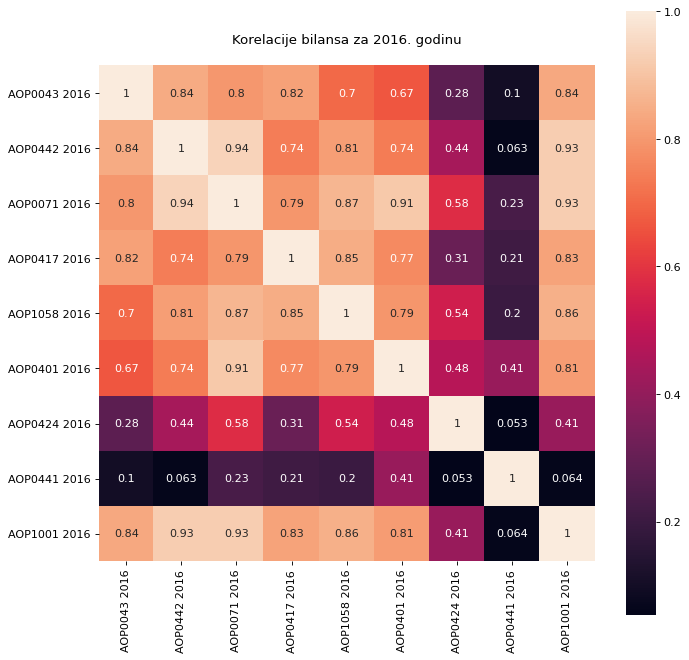

In [9]:
# Calling DataFrame constructor on list 
AOP_1001_2016 = AOP_df_profit_and_loss.iloc[:, 0:9]
AOP_1001_2016 = AOP_1001_2016.apply(pd.to_numeric, errors='coerce')

# Here i am interested in the really strong positive correlation
correlation_2016 = AOP_1001_2016.corr() 
#correlation_2016 = correlation_2016[correlation_2016 > 0.5]

plt.figure(figsize = (10, 10), dpi = 80)
plt.title("Korelacije bilansa za 2016. godinu", pad = 20)
sns.heatmap(correlation_2016, square = True, annot = True)

### Correlation plot for the year 2017

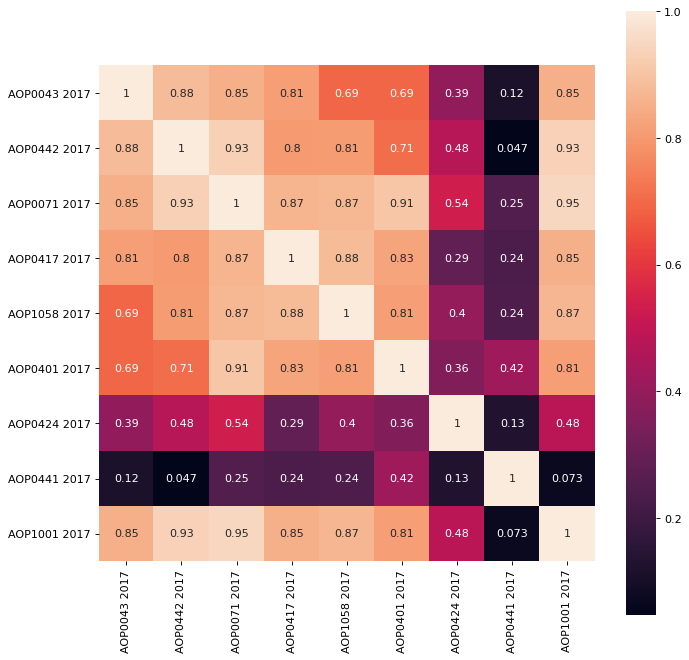

In [10]:
# Calling DataFrame constructor on list 
AOP_1001_2017 = AOP_df_profit_and_loss.iloc[:, 9:18]
AOP_1001_2017 = AOP_1001_2017.apply(pd.to_numeric, errors='coerce')

# Here i am interested in the really strong positive correlation
correlation_2017 = AOP_1001_2017.corr() 
#correlation_2017 = correlation_2017[correlation_2017 > 0.6]
 
plt.figure(figsize = (10, 10), dpi = 80)
sns.heatmap(correlation_2017, square=True,annot=True)

### Correlation plot for the year 2018

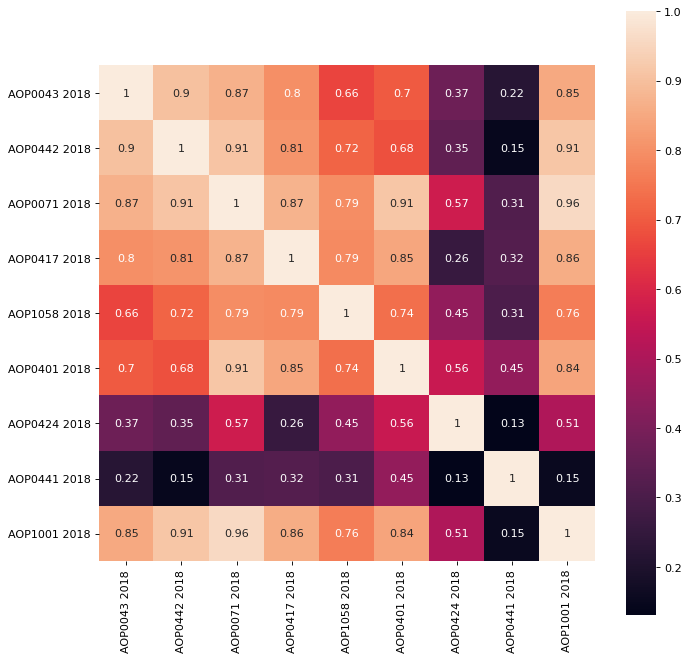

In [11]:
# Calling DataFrame constructor on list 
AOP_1001_2018 = AOP_df_profit_and_loss.iloc[:, 18:]
AOP_1001_2018 = AOP_1001_2018.apply(pd.to_numeric, errors='coerce')

# Here i am interested in the really strong positive correlation
correlation_2018 = AOP_1001_2018.corr() 
#correlation_2018 = correlation_2018[correlation_2018 > 0.5]
 
plt.figure(figsize = (10, 10), dpi = 80)
sns.heatmap(correlation_2018, square=True,annot=True)

## Calculating Altman Z score 

### We found and did some exploring with this method, and believed it is used in predicting credit risk. With more continues of data analysis and with the assistant of financial experts, we are sure to come up with  a much more sophisticated and accurate metric for credit risk

In [12]:
# BILANSI STANJA I USPEHA                   AOP SIFRE
# =======================================================
# Obrtna imovina (Kratkorocna sredstva)   -> AOP0043
# Kratkorocne obaveze                     -> AOP0442
# Ukupna aktiva (Poslovna imovina)        -> AOP0071
# Neraspoređeni dobitak                   -> AOP0417
# Dobitak pre oporezivanja (EBIT)         -> AOP1058
# Kapital                                 -> AOP0401
# Dugorocna rezervisanja i obaveze        -> AOP0424
# Odlozene poreske obaveze                -> AOP0441
# Poslovni prihodi                        -> AOP1001

# Z SKOR PARAMETRI:

# Neto obrtni fond = Obrtna imovina - Kratkorocne obaveze
# T1 = Neto obrtni fond / Ukupna aktiva

# T2 = Neraspoređeni dobitak / Ukupna aktiva

# T3 = Dobitak pre oporezivanja / Ukupna aktiva

# Ukupne obaveze = Dugorocna rezervisanja i obaveze + Odlozene poreske obaveze + Kratkorocne obaveze
# T4 = Kapital / Ukupne obaveze
# T5 = Poslovni prihodi / Ukupna aktiva 

formula_AOPs = ['AOP0043', 'AOP0442', 'AOP0071', 'AOP0417', 'AOP1058', 'AOP0401', 'AOP0424', 'AOP0441', 'AOP1001']
df_ml = df_finansijska_vlasnicka_struktura.dropna()
df_ml_aops = pd.DataFrame()
df_AOP_Z_formula_means = pd.DataFrame(columns=formula_AOPs)
lists_of_AOP_values = []
for column in formula_AOPs:

  df_ml_aops[column+" 2016"] = df_ml[column+" 2016"].replace('-', '-1000000')
  df_ml_aops[column+" 2017"] = df_ml[column+" 2017"].replace('-', '-1000000')
  df_ml_aops[column+" 2018"] = df_ml[column+" 2018"].replace('-', '-1000000')

  df_ml_aops[column+" 2016"] = df_ml_aops[column+" 2016"].astype(int)
  df_ml_aops[column+" 2017"] = df_ml_aops[column+" 2017"].astype(int)
  df_ml_aops[column+" 2018"] = df_ml_aops[column+" 2018"].astype(int)

  df_ml_aops[column+" 2016"] = df_ml_aops[column+" 2016"].replace(-1000000, np.NaN)
  df_ml_aops[column+" 2017"] = df_ml_aops[column+" 2017"].replace(-1000000, np.NaN)
  df_ml_aops[column+" 2018"] = df_ml_aops[column+" 2018"].replace(-1000000, np.NaN)

  df_ml_aops[column+" 2016"] = df_ml_aops[[column+" 2016"]].fillna(df_ml_aops[column+" 2016"].mean())
  df_ml_aops[column+" 2017"] = df_ml_aops[[column+" 2017"]].fillna(df_ml_aops[column+" 2017"].mean())
  df_ml_aops[column+" 2018"] = df_ml_aops[[column+" 2018"]].fillna(df_ml_aops[column+" 2018"].mean())

  AOP_values_2016 = df_ml_aops[column+" 2016"]
  AOP_values_2017 = df_ml_aops[column+" 2017"]
  AOP_values_2018 = df_ml_aops[column+" 2018"]

  df_AOP_Z_formula_means[column] = (AOP_values_2016 + AOP_values_2017 + AOP_values_2018)//3
  AOP_values_list = []
  for value in df_AOP_Z_formula_means[column]:
    if value != '-':
        AOP_values_list.append(value)

  lists_of_AOP_values.append(AOP_values_list)

df_AOP_Z_formula_means

,AOP0043,AOP0442,AOP0071,AOP0417,AOP1058,AOP0401,AOP0424,AOP0441,AOP1001
0,576546.0,174841.0,3010614.0,842475.0,219384.0,2639932.0,95883.0,99956.0,1307556.0
1,57940.0,53178.0,808682.0,45177.0,7033.0,745517.0,9987.0,0.0,267902.0
2,6886.0,5309.0,11683.0,7490.0,1463.0,6374.0,0.0,0.0,115060.0
3,7497.0,1585.0,9821.0,5184.0,383.0,8236.0,0.0,0.0,29023.0
4,3369.0,802.0,3463.0,2659.0,273.0,2659.0,2.0,0.0,14968.0
...,...,...,...,...,...,...,...,...,...
2294,55084.0,49718.0,105924.0,32801.0,7207.0,47397.0,8751.0,213.0,268074.0
2295,55084.0,49718.0,105924.0,32801.0,7207.0,47397.0,8751.0,213.0,268074.0
2296,25289.0,24589.0,25289.0,700.0,452.0,700.0,0.0,0.0,91124.0
2297,2959.0,2873.0,2972.0,96.0,60.0,96.0,0.0,2.0,13654.0


In [13]:
T1 = []
T2 = []
T3 = []
T4 = []
T5 = []
for i in range(len(lists_of_AOP_values[0])):
    t1 = (lists_of_AOP_values[0][i] - lists_of_AOP_values[1][i]) / lists_of_AOP_values[2][i]                             # (AOP0043 - AOP0442) / AOP0071
    t2 = lists_of_AOP_values[3][i] / lists_of_AOP_values[2][i]                                                           # AOP0417 / AOP0071
    t3 = lists_of_AOP_values[4][i] / lists_of_AOP_values[2][i]                                                           # AOP1058 / AOP0071
    t4 = lists_of_AOP_values[5][i] / (lists_of_AOP_values[6][i] + lists_of_AOP_values[7][i] + lists_of_AOP_values[1][i]) # AOP0401 / (AOP0424 + AOP0441 + AOP0442)
    t5 = lists_of_AOP_values[8][i] / lists_of_AOP_values[2][i]                                                           # AOP1001 / AOP0071
    T1.append(t1)
    T2.append(t2)
    T3.append(t3)
    T4.append(t4)
    T5.append(t5)

In [14]:
df_AOP_Z_formula_means.isna().sum()

AOP0043    0
AOP0442    0
AOP0071    0
AOP0417    0
AOP1058    0
AOP0401    0
AOP0424    0
AOP0441    0
AOP1001    0
dtype: int64

In [15]:
df_indexes = df_ml_aops.index.astype(int)
df_indexes

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298],
           dtype='int64', length=2299)

In [16]:
set(pd.Categorical(df_ml['Pravna forma']))

{'-',
 'Akcionarsko društvo',
 'Društvo sa ograničenom odgovornošću',
 'Ortačko društvo',
 'Preduzetnik',
 'Zadruga'}

In [17]:
import math

P_z = pd.DataFrame(columns = ["KupacID", "P_z 500k", "P_z 2M", "P_z 4M", "P_z 6M"])
P_z["KupacID"] = df_ml["KupacID"]
i = 0
for ind in df_indexes:
    je_akcionarsko_drustvo = df_ml['Pravna forma'][ind] == 'Akcionarsko društvo'
    je_drustvo_sa_ogranicenom_odgovornoscu =  df_ml['Pravna forma'][ind] == 'Društvo sa ograničenom odgovornošću'
    if je_akcionarsko_drustvo:
        z = 1.2 * T1[i] + 1.4 * T2[i] + 3.3 * T3[i] + 0.6 * T4[i] + 0.999 * T5[i] # Drustva cijim se kapitalom trguje na berzi
    elif je_drustvo_sa_ogranicenom_odgovornoscu: 
        z = 6.56 * T1[i] + 3.26 * T2[i] + 6.72 * T3[i] + 1.05 * T4[i] # Industrijska proizvodna i neproizvodna drustva i drustva koja posluju u zemljama u razvoju.
    else: 
        z = 0.717 * T1[i] + 0.847 * T2[i] + 3.107 * T3[i] + 0.420 * T4[i] + 0.998 * T5[i] # Privatna privredna drustva cijim se kapitalom NE trguje na berzi.
    
    p_z = 1 - (math.exp(z)/(1 + math.exp(z)))
    P_z["P_z 500k"][ind] = p_z * 5
    P_z["P_z 2M"][ind] = p_z * 20
    P_z["P_z 4M"][ind] = p_z * 40
    P_z["P_z 6M"][ind] = p_z * 60
    i += 1

# Za P_z (verovatnoca bankrota)
# p_z > 1.324 je Visok rizik
# 0.6 <= p_z <= 1.324 je Srednji rizik
# 0.03 <= p_z < 0.6 je Nizak rizik
# p_z < 0.03 je Bez rizika

print("Broj preduzeca bez rizika")
print(len(P_z[P_z['P_z 500k'] < 0.03]))
print(len(P_z[P_z['P_z 2M'] < 0.03]))
print(len(P_z[P_z['P_z 4M'] < 0.03]))
print(len(P_z[P_z['P_z 6M'] < 0.03]))
print()

print("Broj preduzeca sa malim rizikom")
print(len(P_z[(P_z['P_z 500k'] >= 0.03) & (P_z['P_z 500k'] < 0.6)]))
print(len(P_z[(P_z['P_z 2M'] >= 0.03) & (P_z['P_z 2M'] < 0.6)]))
print(len(P_z[(P_z['P_z 4M'] >= 0.03) & (P_z['P_z 4M'] < 0.6)]))
print(len(P_z[(P_z['P_z 6M'] >= 0.03) & (P_z['P_z 6M'] < 0.6)]))
print()

print("Broj preduzeca sa srednjim rizikom")
print(len(P_z[(P_z['P_z 500k'] >= 0.6) & (P_z['P_z 500k'] <= 1.324)]))
print(len(P_z[(P_z['P_z 2M'] >= 0.6) & (P_z['P_z 2M'] <= 1.324)]))
print(len(P_z[(P_z['P_z 4M'] >= 0.6) & (P_z['P_z 4M'] <= 1.324)]))
print(len(P_z[(P_z['P_z 6M'] >= 0.6) & (P_z['P_z 6M'] <= 1.324)]))
print()

print("Broj preduzeca sa velikim rizikom")
print(len(P_z[P_z['P_z 500k'] > 1.324]))
print(len(P_z[P_z['P_z 2M'] > 1.324]))
print(len(P_z[P_z['P_z 4M'] > 1.324]))
print(len(P_z[P_z['P_z 6M'] > 1.324]))
print()

Broj preduzeca bez rizika
445
311
250
225

Broj preduzeca sa malim rizikom
1704
325
306
278

Broj preduzeca sa srednjim rizikom
66
1442
1428
97

Broj preduzeca sa velikim rizikom
84
221
315
1699



In [18]:
def getCategory(data):
  category = ""
  if data < 0.03:
    category = "Nema rizika"
  elif data >= 0.03 and data < 0.6:
    category = "Mali rizik"
  elif data >= 0.6 and data <= 1.324:
    category = "Srednji rizik"
  else:
    category = "Visok rizik"

  return category

df_kategorije_rizika = pd.DataFrame(columns=["KupacID", "P_z 500k Rizik", "P_z 2M Rizik", "P_z 4M Rizik", "P_z 6M Rizik"])
df_kategorije_rizika["KupacID"] = P_z["KupacID"]
for ind in df_indexes:
    df_kategorije_rizika["P_z 500k Rizik"][ind] = getCategory(P_z['P_z 500k'][ind])
    df_kategorije_rizika["P_z 2M Rizik"][ind] = getCategory(P_z['P_z 2M'][ind])
    df_kategorije_rizika["P_z 4M Rizik"][ind] = getCategory(P_z['P_z 4M'][ind])
    df_kategorije_rizika["P_z 6M Rizik"][ind] = getCategory(P_z['P_z 6M'][ind])

df_kategorije_rizika

,KupacID,P_z 500k Rizik,P_z 2M Rizik,P_z 4M Rizik,P_z 6M Rizik
0,10001,Nema rizika,Mali rizik,Mali rizik,Mali rizik
1,10002,Nema rizika,Nema rizika,Nema rizika,Nema rizika
2,10003,Nema rizika,Nema rizika,Nema rizika,Nema rizika
3,10004,Nema rizika,Nema rizika,Nema rizika,Nema rizika
4,10005,Nema rizika,Nema rizika,Mali rizik,Mali rizik
...,...,...,...,...,...
2294,12295,Mali rizik,Srednji rizik,Srednji rizik,Visok rizik
2295,12296,Mali rizik,Srednji rizik,Srednji rizik,Visok rizik
2296,12297,Visok rizik,Visok rizik,Visok rizik,Visok rizik
2297,12298,Visok rizik,Visok rizik,Visok rizik,Visok rizik


In [19]:
#df_kategorije_rizika.to_csv('Result.csv')

In [20]:
X = df_ml.loc[:, "KupacID":"Set bilansa 2018"]
X["KupacID"] = df_ml["KupacID"].astype(int)

# Dodat je broj objekata za svakog klijenta.
X["BrojObjekata"] = X["KupacID"].map(df_kupci.set_index('KupacID1')['BrojObjekata'])
X["PlaceniIznos"] = X["KupacID"].map(df_kupci.set_index('KupacID1')['PlaceniIznos'])
X["IznossaPDV"] = X["KupacID"].map(df_kupci.set_index('KupacID1')['IznossaPDV'])

# Odbacujemo atribute koji prouzrokuju šum
X = X.drop(columns=['KupacID'])
X = X.drop(columns=['KupacNaziv'])

numericki_df = X # Za prikaz statistickih parametara.

# Enkodovanje karakternih kategoričkih atributa u numeričke.
for column in X:
  if X[column].dtype == "object":
    X[column] = pd.Categorical(X[column])
    X[column] = X[column].cat.codes
    numericki_df = numericki_df.drop(columns=[column])

X = pd.concat([X, df_AOP_Z_formula_means], axis=1)
X

,Status kompanije,Sifra delatnosti,Naziv delatnsoti,Pravna forma,Opstina,Mesto,Kreditna_ocena,status_racuna,Trenutni broj dana u blokadi,Trenutni iznos blokade,Broj dana u blokadi u proteklih 24 meseca,Ulazak u blokadu,Godina bilansa 2018,Set bilansa 2018,BrojObjekata,PlaceniIznos,IznossaPDV,AOP0043,AOP0442,AOP0071,AOP0417,AOP1058,AOP0401,AOP0424,AOP0441,AOP1001
0,1,163,15,1,13,57,44,0,0.0,0.0,0.0,0,1,1,1,1331392.03,1331392.03,576546.0,174841.0,3010614.0,842475.0,219384.0,2639932.0,95883.0,99956.0,1307556.0
1,1,163,15,2,18,60,32,0,0.0,0.0,0.0,0,1,1,1,688850.96,688850.96,57940.0,53178.0,808682.0,45177.0,7033.0,745517.0,9987.0,0.0,267902.0
2,1,140,101,4,19,61,31,0,0.0,0.0,0.0,0,1,2,3,23350736.23,23914223.40,6886.0,5309.0,11683.0,7490.0,1463.0,6374.0,0.0,0.0,115060.0
3,1,139,22,2,19,61,29,0,0.0,0.0,0.0,0,1,2,1,273499.50,273499.50,7497.0,1585.0,9821.0,5184.0,383.0,8236.0,0.0,0.0,29023.0
4,1,140,101,4,19,61,34,0,0.0,0.0,0.0,0,1,2,1,2551313.30,2611801.00,3369.0,802.0,3463.0,2659.0,273.0,2659.0,2.0,0.0,14968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,1,141,29,4,85,606,0,0,0.0,0.0,1.0,0,0,0,1,1245672.60,1336259.79,55084.0,49718.0,105924.0,32801.0,7207.0,47397.0,8751.0,213.0,268074.0
2295,2,140,101,4,56,410,0,0,0.0,0.0,0.0,0,0,0,1,1813240.23,1813240.23,55084.0,49718.0,105924.0,32801.0,7207.0,47397.0,8751.0,213.0,268074.0
2296,1,140,101,2,66,496,20,0,0.0,0.0,1.0,0,1,2,1,23520902.99,23743711.35,25289.0,24589.0,25289.0,700.0,452.0,700.0,0.0,0.0,91124.0
2297,1,140,101,2,67,587,20,0,0.0,0.0,0.0,0,1,2,1,4213460.25,4362559.41,2959.0,2873.0,2972.0,96.0,60.0,96.0,0.0,2.0,13654.0


In [21]:
numericki_df = pd.concat([numericki_df, df_AOP_Z_formula_means], axis=1)
numericki_df.describe()

,Trenutni broj dana u blokadi,Trenutni iznos blokade,Broj dana u blokadi u proteklih 24 meseca,BrojObjekata,PlaceniIznos,IznossaPDV,AOP0043,AOP0442,AOP0071,AOP0417,AOP1058,AOP0401,AOP0424,AOP0441,AOP1001
count,2299.000000,2.299000e+03,2299.000000,2299.000000,2.299000e+03,2.299000e+03,2.299000e+03,2.299000e+03,2.299000e+03,2.299000e+03,2299.000000,2.299000e+03,2.299000e+03,2299.000000,2.299000e+03
mean,0.797738,8.959459e+04,2.155285,2.829056,1.781911e+07,1.833752e+07,5.508423e+04,4.971801e+04,1.059240e+05,3.280116e+04,7206.956068,4.739710e+04,8.751060e+03,212.988256,2.680739e+05
std,11.959624,2.629144e+06,16.903885,17.766984,1.011178e+08,1.047247e+08,1.592631e+05,1.647361e+05,3.003377e+05,8.484826e+04,21288.871913,1.391586e+05,3.204927e+04,2143.007883,7.193875e+05
min,0.000000,0.000000e+00,0.000000,1.000000,7.844260e+03,7.844260e+03,2.230000e+02,5.500000e+01,2.230000e+02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,6.530000e+02
25%,0.000000,0.000000e+00,0.000000,1.000000,2.657190e+06,2.717178e+06,1.231900e+04,8.370000e+03,1.470300e+04,3.552000e+03,680.000000,4.501000e+03,0.000000e+00,0.000000,5.341550e+04
50%,0.000000,0.000000e+00,0.000000,1.000000,5.515341e+06,5.668100e+06,5.508400e+04,4.971800e+04,1.059240e+05,3.280100e+04,7207.000000,4.739700e+04,8.751000e+03,213.000000,2.680740e+05
75%,0.000000,0.000000e+00,0.000000,1.000000,1.147409e+07,1.181152e+07,5.508400e+04,4.971800e+04,1.059240e+05,3.280100e+04,7207.000000,4.739700e+04,8.751000e+03,213.000000,2.680740e+05
max,256.000000,1.095305e+08,447.000000,781.000000,4.159145e+09,4.320462e+09,6.072811e+06,4.540662e+06,7.821253e+06,2.057192e+06,504212.000000,3.270104e+06,1.113892e+06,99956.000000,1.846768e+07


In [22]:
y_500k = np.array(df_kategorije_rizika["P_z 500k Rizik"])
y_2M = np.array(df_kategorije_rizika["P_z 2M Rizik"])
y_4M = np.array(df_kategorije_rizika["P_z 4M Rizik"])
y_6M = np.array(df_kategorije_rizika["P_z 6M Rizik"])

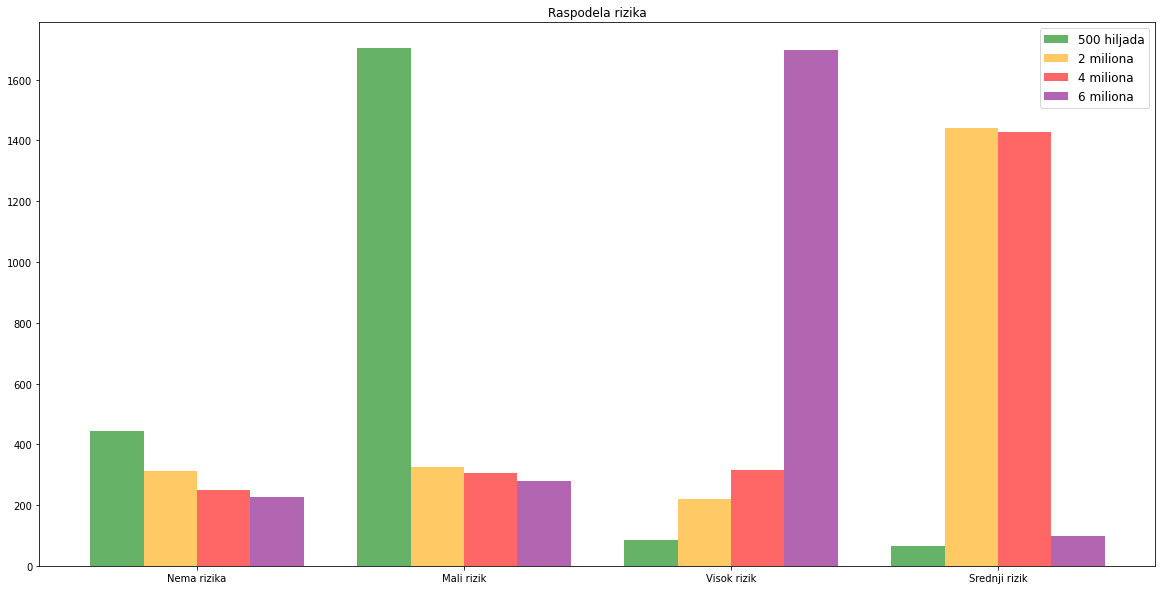

In [23]:
plt.figure(figsize= (20, 10))
plt.hist([y_500k, y_2M, y_4M, y_6M], bins = range(5), align = 'left', histtype= 'bar', color=['green','orange', 'red', 'purple'], label = ['500 hiljada', '2 miliona', '4 miliona', '6 miliona'], alpha=0.6)
plt.legend(prop={'size': 12}, loc = 'upper right')
plt.title('Raspodela rizika')
plt.show()

In [24]:
# Podeli podatke na trening i validacioni skup.
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X_train_500k, X_validation_500k, y_train_500k, y_validation_500k = train_test_split(X, y_500k, train_size = 0.81, random_state=234)
X_train_2M, X_validation_2M, y_train_2M, y_validation_2M = train_test_split(X, y_2M, train_size = 0.81, random_state=234)
X_train_4M, X_validation_4M, y_train_4M, y_validation_4M = train_test_split(X, y_4M, train_size = 0.81, random_state=234)
X_train_6M, X_validation_6M, y_train_6M, y_validation_6M = train_test_split(X, y_6M, train_size = 0.81, random_state=234)
X_train_500k.dtypes

Status kompanije                                int8
Sifra delatnosti                               int16
Naziv delatnsoti                                int8
Pravna forma                                    int8
Opstina                                         int8
Mesto                                          int16
Kreditna_ocena                                  int8
status_racuna                                   int8
Trenutni broj dana u blokadi                 float64
Trenutni iznos blokade                       float64
Broj dana u blokadi u proteklih 24 meseca    float64
Ulazak u blokadu                                int8
Godina bilansa 2018                             int8
Set bilansa 2018                                int8
BrojObjekata                                   int64
PlaceniIznos                                 float64
IznossaPDV                                   float64
AOP0043                                      float64
AOP0442                                      f

In [25]:
print(X_train_500k.shape)
print(X_validation_500k.shape)
print(y_train_500k.shape)
print(y_validation_500k.shape)

(1862, 26)
(437, 26)
(1862,)
(437,)


In [ ]:
# Optimizacija hiperparametara Grid Search metodom
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier()
param_tuning = {
        'learning_rate': [0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
        'max_features': [2, 3, 4],
        'max_depth': [5, 6, 7, 8, 9],
        'min_child_weight': [6, 8, 10, 12, 14],
        'n_estimators' : [150, 200, 250, 300],
        "random_state": [234],
        'objective': ['multi:softprob']
    }
gsearch = GridSearchCV(estimator = xgb_model, param_grid = param_tuning, cv = 5, n_jobs = -1, verbose = 1)
gsearch.fit(X_train_500k, y_train_500k)
gsearch.best_params_

In [26]:
# import machine learning algorithms
#from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, roc_curve, auc 
from sklearn.model_selection import RepeatedKFold, cross_val_score
from numpy import mean, std

# multi:softmax: set XGBoost to do multiclass classification using the softmax objective, you also need to set num_class(number of classes)
# multi:softprob: same as softmax, but output a vector of ndata * nclass,
# which can be further reshaped to ndata * nclass matrix. The result contains predicted probability of each data point belonging to each class.

xgb = XGBClassifier(n_estimators = 300, learning_rate = 0.03, max_features = 2, max_depth = 8, num_class = 4,
                    min_child_weight = 12, objective = "multi:softprob", random_state = 234)
xgb.fit(X_train_500k, y_train_500k)
predictions = xgb.predict(X_validation_500k)

# Prikazi konfuzionu matricu, klasifikacioni izvestaj i tacnost za XGBoost algoritam na validacionom skupu
print("Confusion Matrix:")
print(confusion_matrix(y_validation_500k, predictions))
print()
print("Classification Report")
print(classification_report(y_validation_500k, predictions))
print("Accuracy: {0:.3f} %".format(accuracy_score(y_validation_500k, predictions) * 100))

Confusion Matrix:
[[320  14   0   0]
 [ 14  61   0   0]
 [  9   2   0   3]
 [  4   0   2   8]]

Classification Report
               precision    recall  f1-score   support

   Mali rizik       0.92      0.96      0.94       334
  Nema rizika       0.79      0.81      0.80        75
Srednji rizik       0.00      0.00      0.00        14
  Visok rizik       0.73      0.57      0.64        14

     accuracy                           0.89       437
    macro avg       0.61      0.59      0.60       437
 weighted avg       0.86      0.89      0.88       437

Accuracy: 89.016 %


Text(0.5, 1.0, 'Matrica konfuzije sa normalizacijom')

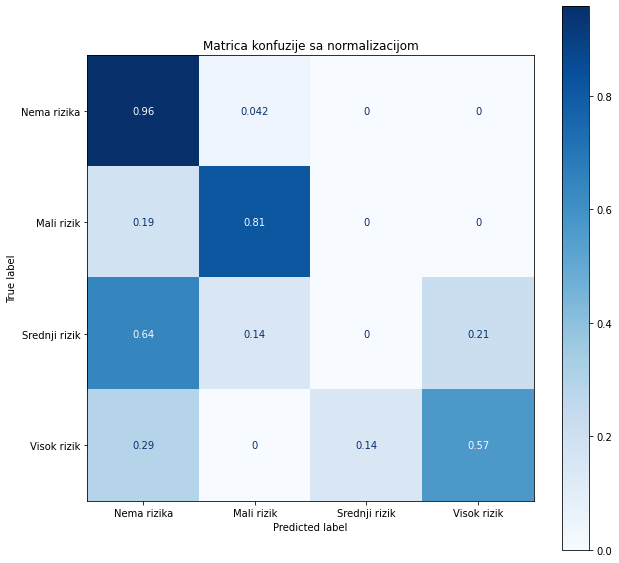

In [27]:
y_validation_500k_transform = y_validation_500k.reshape(-1, 1).astype(str)
predictions_transform = predictions.reshape(-1, 1).astype(str)
classes = ["Nema rizika", "Mali rizik", "Srednji rizik", "Visok rizik"]
fig, ax = plt.subplots(figsize=(10, 10))
conf_matrix = plot_confusion_matrix(xgb, X_validation_500k, y_validation_500k_transform, display_labels = classes, cmap = plt.cm.Blues, normalize = "true", ax = ax)
conf_matrix.ax_.set_title('Matrica konfuzije sa normalizacijom')

In [28]:
def number_encoding(array):
  result = array.astype(str)
  for i in range(len(result)):
    if result[i] == "Nema rizika":
      result[i] = "0"
    elif result[i] == "Mali rizik":
      result[i] = "1"
    elif result[i] == "Srednji rizik":
      result[i] = "2"
    else:
      result[i] = "3"

  result = result.astype(int)
  return result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


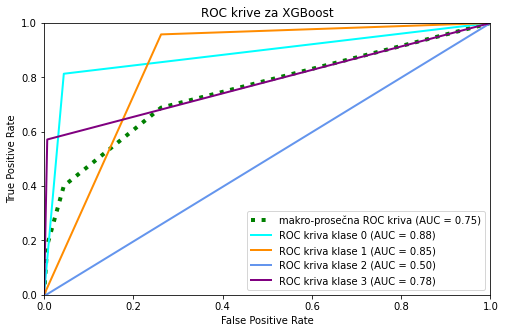

In [29]:
from scipy import interp
from itertools import cycle

nb=xgb.score(X_train_500k, y_train_500k)
y_nums = number_encoding(y_validation_500k)
pred1=number_encoding(xgb.predict(X_validation_500k))

t1=sum(x==0 for x in pred1-y_nums)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_nums))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(4)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(4):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 4

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"], label='makro-prosečna ROC kriva (AUC = {0:0.2f})'.format(roc_auc["macro"]), color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC kriva klase {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC krive za XGBoost')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

def plot_cumulative_gain_multiclass(y_true, y_probas, title='Cumulative Gains Curve', ax=None, figsize=None, title_fontsize="large", text_fontsize="medium"):
  y_true = np.array(y_true)
  y_probas = np.array(y_probas)
  classes = np.unique(y_true)
  print(classes)

  # Compute Cumulative Gain Curves
  percentages, gains1 = skplt.metrics.cumulative_gain_curve(y_true, y_probas[:, 2], classes[2])
  percentages, gains2 = skplt.metrics.cumulative_gain_curve(y_true, y_probas[:, 3], classes[3])
  percentages, gains3 = skplt.metrics.cumulative_gain_curve(y_true, y_probas[:, 0], classes[0])
  percentages, gains4 = skplt.metrics.cumulative_gain_curve(y_true, y_probas[:, 1], classes[1])
  if ax is None:
      fig, ax = plt.subplots(1, 1, figsize=figsize)
  ax.set_title(title, fontsize=title_fontsize)
  ax.plot(percentages, gains1, lw=3, label='{}'.format(classes[0]))
  ax.plot(percentages, gains2, lw=3, label='{}'.format(classes[1]))
  ax.plot(percentages, gains3, lw=3, label='{}'.format(classes[2]))
  ax.plot(percentages, gains4, lw=3, label='{}'.format(classes[3]))
  ax.set_xlim([0.0, 1.0])
  ax.set_ylim([0.0, 1.0])
  ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Baseline')
  ax.set_xlabel('Procenat uzorka', fontsize=text_fontsize)
  ax.set_ylabel('Dobitak', fontsize=text_fontsize)
  ax.tick_params(labelsize=text_fontsize)
  ax.grid('on')
  ax.legend(loc='lower right', fontsize=text_fontsize)
  return ax

['Mali rizik' 'Nema rizika' 'Srednji rizik' 'Visok rizik']


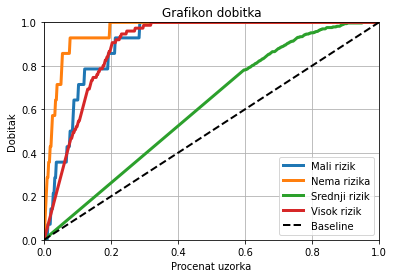

In [ ]:
# Dodati grafikone dobitka i podizanja
pred_proba = xgb.predict_proba(X_validation_500k)
plot_cumulative_gain_multiclass(y_validation_500k_transform, pred_proba, "Grafikon dobitka")

In [ ]:
def plot_lift_curve_multilcass(y_true, y_probas, title='Lift Curve', ax=None, figsize=None, title_fontsize="large", text_fontsize="medium"):
  y_true = np.array(y_true)
  y_probas = np.array(y_probas)
  classes = np.unique(y_true)

  # Compute Cumulative Gain Curves
  percentages, gains1 = skplt.metrics.cumulative_gain_curve(y_true, y_probas[:, 2], classes[2])
  percentages, gains2 = skplt.metrics.cumulative_gain_curve(y_true, y_probas[:, 3], classes[3])
  percentages, gains3 = skplt.metrics.cumulative_gain_curve(y_true, y_probas[:, 0], classes[0])
  percentages, gains4 = skplt.metrics.cumulative_gain_curve(y_true, y_probas[:, 1], classes[1])
  percentages = percentages[1:]
  gains1 = gains1[1:]
  gains2 = gains2[1:]
  gains3 = gains3[1:]
  gains4 = gains4[1:]
  gains1 = gains1 / percentages
  gains2 = gains2 / percentages
  gains3 = gains3 / percentages
  gains4 = gains4 / percentages
  if ax is None:
      fig, ax = plt.subplots(1, 1, figsize=figsize)
  ax.set_title(title, fontsize=title_fontsize)
  ax.plot(percentages, gains1, lw=3, label='{}'.format(classes[0]))
  ax.plot(percentages, gains2, lw=3, label='{}'.format(classes[1]))
  ax.plot(percentages, gains3, lw=3, label='{}'.format(classes[2]))
  ax.plot(percentages, gains4, lw=3, label='{}'.format(classes[3]))
  ax.plot([0, 1], [1, 1], 'k--', lw=2, label='Baseline')
  ax.set_xlabel('Procenat uzorka', fontsize=text_fontsize)
  ax.set_ylabel('Podizanje', fontsize=text_fontsize)
  ax.tick_params(labelsize=text_fontsize)
  ax.grid('on')
  ax.legend(loc='lower right', fontsize=text_fontsize)
  return ax

<Figure size 504x504 with 0 Axes>

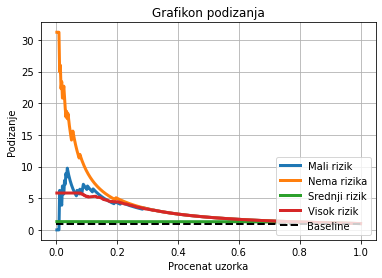

In [ ]:
plt.figure(figsize=(7,7))
plot_lift_curve_multilcass(y_validation_500k, pred_proba, "Grafikon podizanja")
plt.show()

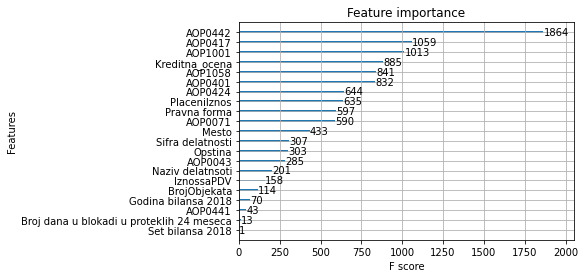

In [ ]:
# Znacajnost atributa (Feature Importance)
from xgboost import plot_importance
plot_importance(xgb)

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
xgb_cv = XGBClassifier(n_estimators = 300, learning_rate = 0.04, max_features = 2, max_depth = 8, num_class = 4,
                    min_child_weight = 12, objective = "multi:softprob", random_state = 234)
scores = cross_val_score(xgb_cv, X, y_500k, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.895 (0.020)


In [31]:
xgb1 = XGBClassifier(n_estimators = 300, learning_rate = 0.03, max_features = 2, max_depth = 8, num_class = 4,
                    min_child_weight = 12, objective = "multi:softprob", random_state = 234)
xgb1.fit(X, y_500k)
predictions1 = xgb1.predict(X)

xgb2 = XGBClassifier(n_estimators = 300, learning_rate = 0.03, max_features = 2, max_depth = 8, num_class = 4,
                    min_child_weight = 12, objective = "multi:softprob", random_state = 234)
xgb2.fit(X, y_2M)
predictions2 = xgb2.predict(X)

xgb3 = XGBClassifier(n_estimators = 300, learning_rate = 0.03, max_features = 2, max_depth = 8, num_class = 4,
                    min_child_weight = 12, objective = "multi:softprob", random_state = 234)
xgb3.fit(X, y_4M)
predictions3 = xgb3.predict(X)

xgb4 = XGBClassifier(n_estimators = 300, learning_rate = 0.03, max_features = 2, max_depth = 8, num_class = 4,
                    min_child_weight = 12, objective = "multi:softprob", random_state = 234)
xgb4.fit(X, y_6M)
predictions4 = xgb4.predict(X)

In [38]:
def merge_into_dataframe(kupacID, kupacNaziv, X, predictions1, predictions2, predictions3, predictions4):
  result_df = pd.DataFrame()
  result_df["KupacID"] = kupacID.astype(int)
  result_df["KupacNaziv"] = kupacNaziv
  result_df = pd.concat([result_df, X],  axis = 1)
  result_df["y_500k"] = pd.Series(predictions1)
  result_df["y_2M"] = pd.Series(predictions2)
  result_df["y_4M"] = pd.Series(predictions3)
  result_df["y_6M"] = pd.Series(predictions4)
  return result_df

dataframe = merge_into_dataframe(df_ml["KupacID"], df_ml["KupacNaziv"], X, predictions1, predictions2, predictions3, predictions4)
dataframe

,KupacID,KupacNaziv,Status kompanije,Sifra delatnosti,Naziv delatnsoti,Pravna forma,Opstina,Mesto,Kreditna_ocena,status_racuna,Trenutni broj dana u blokadi,Trenutni iznos blokade,Broj dana u blokadi u proteklih 24 meseca,Ulazak u blokadu,Godina bilansa 2018,Set bilansa 2018,BrojObjekata,PlaceniIznos,IznossaPDV,AOP0043,AOP0442,AOP0071,AOP0417,AOP1058,AOP0401,AOP0424,AOP0441,AOP1001,y_500k,y_2M,y_4M,y_6M
0,10001,Customer 1,1,163,15,1,13,57,44,0,0.0,0.0,0.0,0,1,1,1,1331392.03,1331392.03,576546.0,174841.0,3010614.0,842475.0,219384.0,2639932.0,95883.0,99956.0,1307556.0,Nema rizika,Mali rizik,Mali rizik,Mali rizik
1,10002,Customer 2,1,163,15,2,18,60,32,0,0.0,0.0,0.0,0,1,1,1,688850.96,688850.96,57940.0,53178.0,808682.0,45177.0,7033.0,745517.0,9987.0,0.0,267902.0,Nema rizika,Nema rizika,Mali rizik,Mali rizik
2,10003,Customer 3,1,140,101,4,19,61,31,0,0.0,0.0,0.0,0,1,2,3,23350736.23,23914223.40,6886.0,5309.0,11683.0,7490.0,1463.0,6374.0,0.0,0.0,115060.0,Nema rizika,Nema rizika,Nema rizika,Nema rizika
3,10004,Customer 4,1,139,22,2,19,61,29,0,0.0,0.0,0.0,0,1,2,1,273499.50,273499.50,7497.0,1585.0,9821.0,5184.0,383.0,8236.0,0.0,0.0,29023.0,Nema rizika,Nema rizika,Nema rizika,Nema rizika
4,10005,Customer 5,1,140,101,4,19,61,34,0,0.0,0.0,0.0,0,1,2,1,2551313.30,2611801.00,3369.0,802.0,3463.0,2659.0,273.0,2659.0,2.0,0.0,14968.0,Nema rizika,Nema rizika,Mali rizik,Mali rizik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,12295,Customer 2295,1,141,29,4,85,606,0,0,0.0,0.0,1.0,0,0,0,1,1245672.60,1336259.79,55084.0,49718.0,105924.0,32801.0,7207.0,47397.0,8751.0,213.0,268074.0,Mali rizik,Srednji rizik,Srednji rizik,Visok rizik
2295,12296,Customer 2296,2,140,101,4,56,410,0,0,0.0,0.0,0.0,0,0,0,1,1813240.23,1813240.23,55084.0,49718.0,105924.0,32801.0,7207.0,47397.0,8751.0,213.0,268074.0,Mali rizik,Srednji rizik,Srednji rizik,Visok rizik
2296,12297,Customer 2297,1,140,101,2,66,496,20,0,0.0,0.0,1.0,0,1,2,1,23520902.99,23743711.35,25289.0,24589.0,25289.0,700.0,452.0,700.0,0.0,0.0,91124.0,Visok rizik,Visok rizik,Visok rizik,Visok rizik
2297,12298,Customer 2298,1,140,101,2,67,587,20,0,0.0,0.0,0.0,0,1,2,1,4213460.25,4362559.41,2959.0,2873.0,2972.0,96.0,60.0,96.0,0.0,2.0,13654.0,Visok rizik,Visok rizik,Visok rizik,Visok rizik


In [57]:
def find_client(dataframe, identifier):
  client = ''
  if type(identifier) == int:
    client = dataframe.loc[dataframe['KupacID'] == identifier]
  else:
    client = dataframe.loc[dataframe['KupacNaziv'] == identifier]
  if client.empty:
    client = 'Klijent sa takvinm identifikatorom ne postoji u skupu podataka.'
  return client

In [61]:
atribut = input('Da li zeltie da nadjete kliijenta na osnovu KupacID ili KupacNaziv atributa? ')
if atribut == "KupacID":
  id = int(input("Unesite id klijenta: "))
  client = find_client(dataframe, id)
elif atribut == "KupacNaziv":
  naziv = input("Unesite naziv klijenta: ")
  client = find_client(dataframe, naziv)
else:
  print("Klijent se moze traziti samo na osnovu KupacID i KupacNaziv atributa")
client

Da li zeltie da nadjete kliijenta na osnovu KupacID ili KupacNaziv atributa? KupacID
Unesite id klijenta: 10111


,KupacID,KupacNaziv,Status kompanije,Sifra delatnosti,Naziv delatnsoti,Pravna forma,Opstina,Mesto,Kreditna_ocena,status_racuna,Trenutni broj dana u blokadi,Trenutni iznos blokade,Broj dana u blokadi u proteklih 24 meseca,Ulazak u blokadu,Godina bilansa 2018,Set bilansa 2018,BrojObjekata,PlaceniIznos,IznossaPDV,AOP0043,AOP0442,AOP0071,AOP0417,AOP1058,AOP0401,AOP0424,AOP0441,AOP1001,y_500k,y_2M,y_4M,y_6M
110,10111,Customer 111,1,140,101,4,1,198,15,0,0.0,0.0,0.0,0,0,0,1,8223001.66,8429442.41,55084.0,49718.0,105924.0,32801.0,7207.0,47397.0,8751.0,213.0,268074.0,Mali rizik,Srednji rizik,Srednji rizik,Visok rizik
